## EECS 731 Project 3: Weekend movie trip

In this project, I will be reading from [movie-based datasets](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip) and performing clustering in order to find movies that are similar to one another. In particular, I will look into how the average ratings and individual genres for each movie affects the resulting clusters generated. In total, I performing clustering 18 times (once for each genre).

In addition to the above link, the datasets I used can also be found in the data/raw/ directory.

### Python Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

### Clustering Model Creation

For this project, I will be evaluating the following five clustering model approaches:

- K-Means
- Expectation-Maximization (GMM)
- Mean-Shift
- DBSCAN
- Hierarchical Agllomerative Clustering (HAC)

I create the specific models with the following parameters:

In [2]:
kmeans_model = KMeans(n_clusters=2, random_state=0)
gmm_model = GaussianMixture(n_components=2)
ms_model = MeanShift()
dbscan_model = DBSCAN()
hac_model = AgglomerativeClustering(n_clusters=2)

In this case, I am looking for the models to find 2 clusters as each evaluated dataset will be composed of movies that are categorized as a genre, and the remaining videos that are not. Visually speaking, the datasets will appear as two horizontal lines: one at a y-value of 1 comprised of movies categorized as a genre, and one at a y-value of 0 comprised of the remaining movies. The x-values for each evaluated dataset will then be based on the average ratings for each movie.

### Reading the Raw Datasets

For this project, I only read from the movies.csv and ratings.csv files.

In [3]:
movie_list = pd.read_csv("../data/raw/movies.csv")
movie_list

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
ratings_list = pd.read_csv("../data/raw/ratings.csv")
ratings_list

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Preparing Genre Extraction

In the movies.csv dataset, the genres for each movie are given as a string delimited by a "|" character. In order to separate the genres into their own individual columns, I create a 2D array (genre_matrix) for holding the individual genres of each movie.

In [5]:
genre_list = ["Action","Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
genre_matrix = []
for genre in genre_list:
    genre_matrix.append([])

### Parsing the Datasets

For each movie in the movies.csv datasets, I seek to retrieve the following features:

- Movie ID
- Averages Rating Score
- Genres

The movie IDs can be retrieved from its own individual column in the movies.csv dataset.

For the average ratings, I determine all the individual ratings for a given movie in the ratings.csv dataset and calculate the average rating based on them. 

Finally, to separate each movies genres, I separate the given genre string into an array with all of a given movie's genres. For each genre that a movie is categorized as, I assign a value of 1 to the corresponding entry in the genre_matrix 2D array while the remaining entries are set to 0 (i.e. genres that don't categorize the movie).

In [6]:
movie_ids = []
movie_genres = []
movie_ratings = []
for i in range(len(movie_list)):
    movie_ids.append(movie_list["movieId"][i])
    movie_ratings.append(ratings_list.query("movieId=={}".format(movie_ids[i]))["rating"].mean())
    movie_genres.append(movie_list["genres"][i].split("|"))
    for j,genre in enumerate(genre_list):
        if genre in movie_genres[i]:
            genre_matrix[j].append(1)
        else:
            genre_matrix[j].append(0)

### Preparing the Dataset

With all of the desired features obtained, I combine all of them into a new dataset and save it in the data/processed/ directory.

In [7]:
movies_dataset = pd.DataFrame({"movieId":movie_ids,"rating":movie_ratings,
                               "Action":genre_matrix[0],"Adventure":genre_matrix[1],
                               "Animation":genre_matrix[2],"Children":genre_matrix[3],
                               "Comedy":genre_matrix[4],"Crime":genre_matrix[5],
                               "Documentary":genre_matrix[6],"Drama":genre_matrix[7],
                               "Fantasy":genre_matrix[8],"Film-Noir":genre_matrix[9],
                               "Horror":genre_matrix[10],"Musical":genre_matrix[11],
                               "Mystery":genre_matrix[12],"Romance":genre_matrix[13],
                               "Sci-Fi":genre_matrix[14],"Thriller":genre_matrix[15],
                               "War":genre_matrix[16],"Western":genre_matrix[17]}).dropna()
movies_dataset.to_csv("../data/processed/movies_dataset.csv")  
movies_dataset

,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3.920930,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,3.431818,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,3.259615,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,2.357143,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,3.071429,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,4.000000,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9738,193583,3.500000,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9739,193585,3.500000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9740,193587,3.500000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In order the use the dataset created in the previous step, I extract two columns from it for each round of clustering that is performed: the average ratings for each movie and each individual genre. As a result, I end up performing clustering on 18 total datasets.

For the sake of not showing numerous graphs, I'll showcase the results for the Action genre dataset that I create. Note that the results for all 18 genres can be found in the visualizations/ directory.

## Clustering Performance - Action Genre

In order to perform clustering for the Action genre, I extract the ratings and Action columns from the created dataset:

In [8]:
genre_dataset = movies_dataset.loc[:,("rating","Action")]

For this example, I chose the Action genre because it's the first genre from the overall list when sorted alphabetically. Note that the source code found in src/project3.py/ uses a for loop to iterate through all of the genres and instead uses a variable to retrieve the second column instead of hardcoding each genre's name (i.e. genre instead of "Action").

For each of the clustering models evaluated, I perform the following steps:

- Fit the model to the extracted dataset.
- Predict the cluster centroids.
- Plot the results in a scatter graph.

I also create a 6-figure grid of Matplotlib subplots so that all of the results can be seen in a single image. In this case, since only five of the graphs are going to be populated, I remove the sixth subplot so that an empty graph isn't shown.

Once all of the clustering models have been run, I enlarge the size of the graph so that the subplot titles don't overlap with the graphs. I then save the collective set of graphs in the visualizations/ directory and then display them.

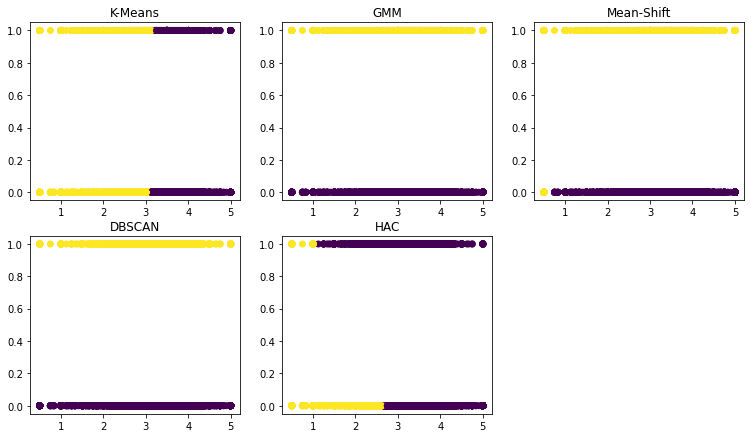

In [9]:
_,graphs = plt.subplots(2,3)  
graphs[1,2].set_axis_off()   

movies_pred = kmeans_model.fit_predict(genre_dataset)
graphs[0,0].scatter(genre_dataset.iloc[:,0], genre_dataset.iloc[:,1], c=movies_pred)
graphs[0,0].set_title("K-Means")

movies_pred = gmm_model.fit_predict(genre_dataset)
graphs[0,1].scatter(genre_dataset.iloc[:,0], genre_dataset.iloc[:,1], c=movies_pred)
graphs[0,1].set_title("GMM") 

movies_pred = ms_model.fit_predict(genre_dataset)
graphs[0,2].scatter(genre_dataset.iloc[:,0], genre_dataset.iloc[:,1], c=movies_pred)
graphs[0,2].set_title("Mean-Shift")

movies_pred = dbscan_model.fit_predict(genre_dataset)
graphs[1,0].scatter(genre_dataset.iloc[:,0], genre_dataset.iloc[:,1], c=movies_pred)
graphs[1,0].set_title("DBSCAN") 

movies_pred = hac_model.fit_predict(genre_dataset)
graphs[1,1].scatter(genre_dataset.iloc[:,0], genre_dataset.iloc[:,1], c=movies_pred)
graphs[1,1].set_title("HAC")

plt.gcf().set_size_inches((12.80,7.20), forward=False)
plt.savefig("../visualizations/Action.png", bbox_inches='tight', dpi=100)
plt.show()   

Note that the same process is then repeated 17 times, once for each of the other genres.

### Results for the Action Genre

Based on the scatter plots generated from the clustering models' predictions, it's apparent that the GMM, Mean-Shift and DBSCAN models were able to successfully find the desired clusters. The K-Means and HAC models, on the other hand, both failed to successfully identify the visually distinct clusters and instead generated clusters that had mixes of Action and non-Action movies. On a per-model basis, these differences in performance are most likely due to the following reasons:

- For the K-Means model, since the Action genre column is a categorical feature, the model most likely struggled to adapt to those values and instead seems to focus primarily on clustering based on the average ratings. As a result, it instead created clusters that split the dataset across the x-axis instead of the y-axis as desired.
- For the GMM model, because it can handle categorical data better than the K-Means model, for example, it was able to adapt to the values in the Action genre column and successfully identify the clusters that split the dataset across the y-axis.
- For the Mean-Shift model, in this case, since the clusters are more densly clustered, the model was more likely to be able to identify the correct clusters. Note that this wasn't the case for some of the other genres, which I further discuss in the following section.
- For the DBSCAN model, since the desired clusters have datapoints that are more closely connected, the model was most likely able to identify the clusters as a result.
- For the HAC model, since it's based on datapoint distances, it seemed to calculate the distances primarily with the average rating values for each datapoint rather than the genre values, thus leading to worse performance.

In the end, from the results gathered and displayed above, it can be said that the GMM, Mean-Shift and DBSCAN clustering approaches would be viable for finding similar action movies based on their average ratings.

## General Results

For the most part, the results for four of the models were consistent across all 18 evaluated genres:

- The GMM model was able to correctly identify the desired clusters for all evaluated genres.
- The HBSCAN model was able to correctly identify the desired clusters in most of the evaluated genres. In the genres (e.g. Film-Noir, Western, etc.) the model generated three clusters where the third cluster was comprised of outliers from one of the desired clusters. However, since none of the clusters mixed movies from the desired clusters, it can be said that the model's performance was still very good.
- The K-Means model failed to correctly identify the desired clusters for any of the evaluated genres. In fact, in each case it generated clusters that split the graph on the x-axis, similar to the Action genre results. While this is most likely due to the reasons discussed above, it can be definitively seen that the K-Means model isn't a good clustering approach for this problem.
- The HAC model failed to correctly identify the desired clusters for most of the evaluated genres. In some cases (Documentary, Western, etc.), the model largely identified the desired clusters, but mis-categorized some outliers from one of the clusters as part of the other cluster. As such, the HAC approach could be viable in a small number of instances, though it still wouldn't be preferable to some of the other models evaluated.

The Mean-Shift model, on the other hand, had mixed results across all of the evaluated genres. In some cases, like the Action genre, it was able to identify the correct clusters while in other cases (e.g. Adventure, Animation, etc.) it identified incorrect clusters. Also, in multiple instances, the model generated numerous clusters (e.g. Animation) with their being no perceivable pattern in terms of the clusters' accuracy. This mixed performance is likely due to the Mean-Shift's tendency to generate dense clusters which, as can be seen, resulted in a larger number of smaller clusters. Regardless, it can still be said that while the Mean-Shift approach could be viable in some cases, some of the other models tested would be far more preferable.